# Importação da bibliotecas

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import utils_imagem as utl

# Definição de constantes

In [2]:
m = 180 # altura da imagem
n = 130 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Altera o valor da constante no módulo de processamento de imagens
utl.DIMENSAO_IMAGEM = DIMENSAO_IMAGEM

utl.NOME_AMBIENTE = 'MAIN'

# Posição da imagem na matriz A
indice_yuri = 20

# Gerar matrizes A e M, e a face média 

In [3]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q_1, A_1) = utl.varrer_banco_imagens('src/EMAP_face_db/*')
(q_2, A_2) = utl.varrer_banco_imagens('src/FEI_face_db/*')

# Juntando as duas partes para a matriz definitiva
q = q_1 + q_2
A = np.hstack((A_1, A_2))

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Altera o valor da constante no módulo de processamento de imagens
utl.FACE_MEDIA = face_media

# Matriz M(mn x q) de média corrigida
M = A - face_media 

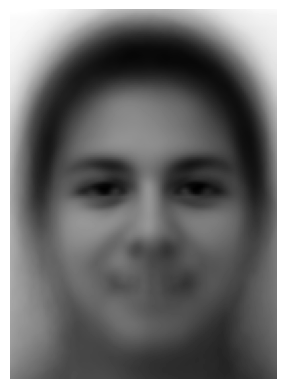

In [4]:
utl.plotar_imagem(face_media)

# Visualização das imagens de A e M

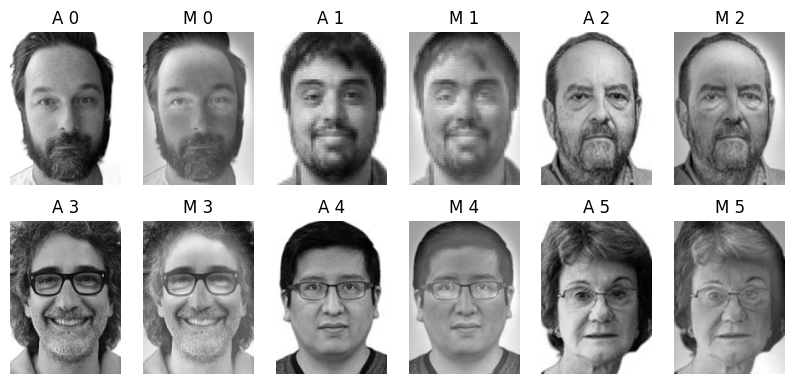

In [5]:
utl.plotar_grade_alternada((A,M), ('A','M'), True, 2, 6, (10,4.5), '')

# Gerar matrizes U e C

In [6]:
# Matriz de covariância de A, C(mn x mn)
C = np.cov(M)

In [7]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_C, autovalores_C, _ = randomized_svd(C, n_components=200, n_iter=5, random_state=None)

In [8]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_A, autovalores_A, _ = np.linalg.svd(A, full_matrices=False) # U já está ordenada em relação aos autovalores

# Visualizar as 10 eigenfaces mais relevantes de A e C

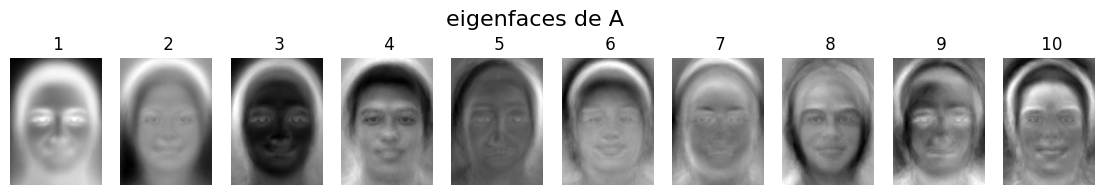

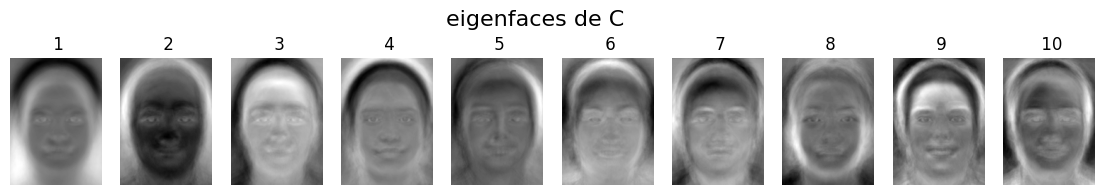

In [9]:
utl.plotar_grade(U_A, '', 1, 10, (14,2.3), 'eigenfaces de A')
utl.plotar_grade(U_C, '', 1, 10, (14,2.3), 'eigenfaces de C')

# Visualizar as 10 eigenfaces menos relevantes de A e C

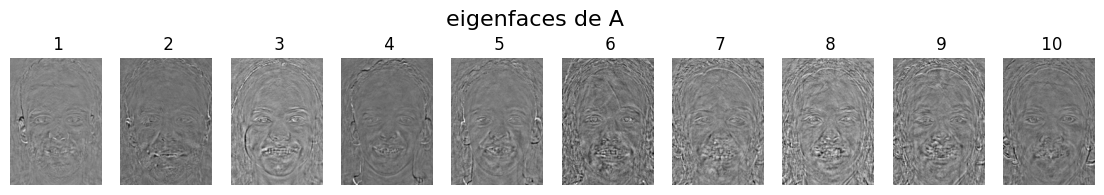

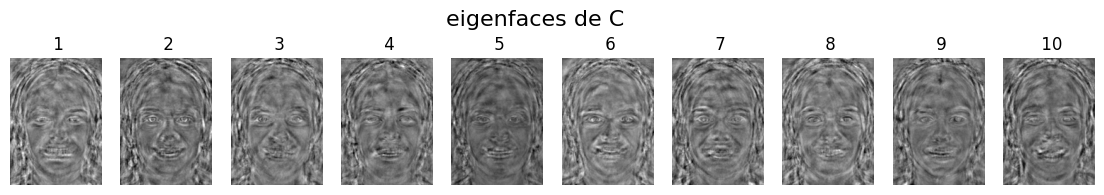

In [10]:
utl.plotar_grade(U_A[:,::-1], '', 1, 10, (14,2.3), 'eigenfaces de A')
utl.plotar_grade(U_C[:,::-1], '', 1, 10, (14,2.3), 'eigenfaces de C')

# Reconstrução a partir de A (SVD) e C (PCA)

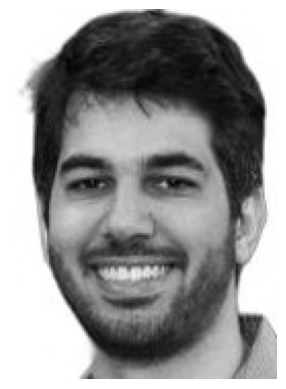

In [11]:
# Indice a imagem a ser reconstruida
imagem_escolhida = indice_yuri
utl.plotar_imagem(A[:,imagem_escolhida])

In [12]:
# Coeficientes de projeção para as eigenfaces de U_A e U_C
coef_A = np.dot(U_A.T, M) # coeficientes de A
coef_C = np.dot(U_C.T, M) # coeficientes de C

In [13]:
# Intervalo com a quantidade de eigenfaces usadas para reconstruir cada imagem
intervalo = [5, 25, 50, 80, 100, 130, 200, 250, 350, 430]

# Gera uma lista com imagens reconstruidas considerando a quantidade de eigenfaces na lista 'intervalo'
img_proj_A = utl.listar_projecoes(U_A, coef_A, intervalo, imagem_escolhida)
img_proj_C = utl.listar_projecoes(U_C, coef_C, intervalo, imagem_escolhida)

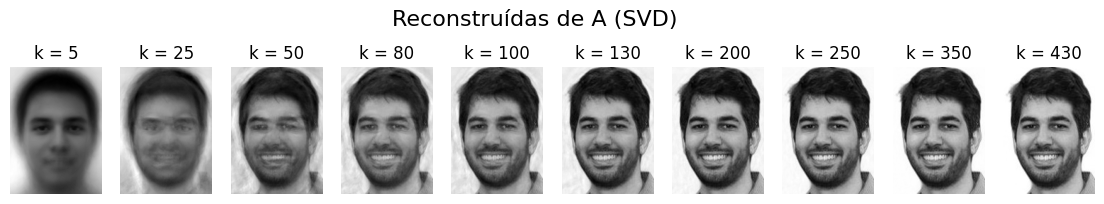

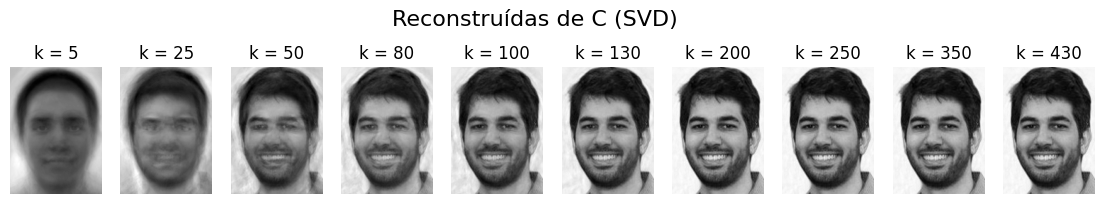

In [14]:
# Plotagem das imagens
utl.plotar_grade(img_proj_A, intervalo, 1, len(intervalo), (14,2.5), 'Reconstruídas de A (SVD)')
utl.plotar_grade(img_proj_C, intervalo, 1, len(intervalo), (14,2.5), 'Reconstruídas de C (SVD)')

# Espaço na memória ocupado pelas matrizes:

In [15]:
U_A_k100 = U_A[:,:100] # primeiras 100 eigenfaces da matriz U_A

In [16]:
utl.exibir_memoria_ocupada([A, M, C, U_A_k100, coef_A])

A ocupa 76,8 mb = 0,1 gb 
M ocupa 76,8 mb = 0,1 gb 
C ocupa 4.177,6 mb = 4,1 gb 
U_A_k100 ocupa 17,9 mb = 0,0 gb 
coef_A ocupa 1,4 mb = 0,0 gb 


In [17]:
# Apaga C da memória (liberando 4gb) por não ser mais necessária
del C

Como visto abaixo, o resultado dos dois processos é idêntico. A diferença entre eles é que é muito menos custoso manter e fazer a decomposição SVD da matriz A do que fazer o mesmo com a matriz de covariância C

# Relevância das eigenfaces de A e C

In [18]:
def exibir_relevancia_eigenfaces(autovalores: np.ndarray, titulo: str) -> None :
    soma_total = autovalores.sum()

    print(autovalores.shape)
    
    # Vetor com a relevância (percentual) de cada autovalores
    relevancia = autovalores / soma_total
   
    # Plotar o percentual de valores em um gráfico de barras
    plt.plot(relevancia, marker='o', linestyle='-')
    plt.xlabel('Autovetor')
    plt.ylabel('Percentual')
    plt.title(f'Relevância das eigenfaces {titulo}')
    plt.show()
    
    return None

(100,)


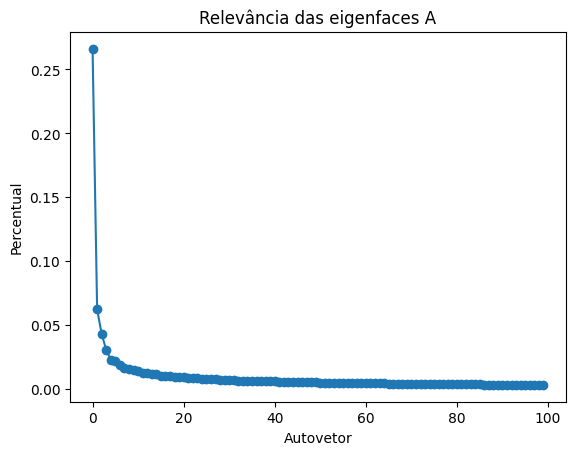

In [19]:
exibir_relevancia_eigenfaces(autovalores_A[:100], 'A')

(100,)


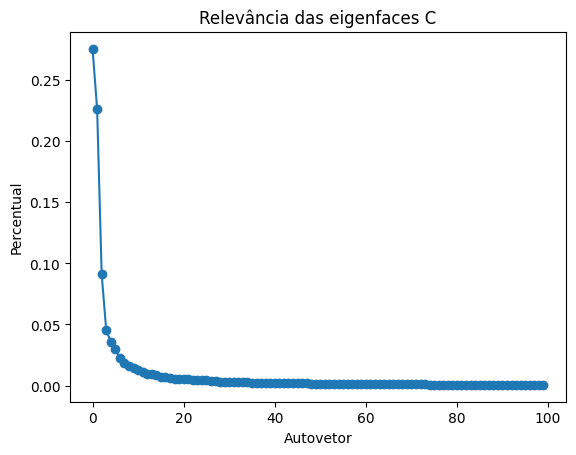

In [20]:
exibir_relevancia_eigenfaces(autovalores_C[:100], 'C')